In [64]:
%matplotlib inline

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (12, 5)
sns.set_theme()

In [57]:
X = pd.read_csv('data/11_x.csv', header=None, names=[f'x_{i}' for i in range(5)])
y = pd.read_csv('data/11_y.csv', header=None, names=['y'])

In [58]:
X.shape, X.describe()

((66, 5),
              x_0        x_1        x_2        x_3        x_4
 count  66.000000  66.000000  66.000000  66.000000  66.000000
 mean   -0.030777  -0.010728   0.046851   0.204618   0.115513
 std     1.089200   0.960890   1.007246   1.212652   1.031296
 min    -2.275397  -2.538548  -1.853401  -2.837253  -2.178582
 25%    -0.829504  -0.610886  -0.796535  -0.723116  -0.499444
 50%    -0.023577   0.015184   0.123631   0.267437   0.009668
 75%     0.674766   0.679896   0.815196   0.987150   0.869323
 max     2.910753   2.802265   2.081260   2.854461   2.496833)

Признаки слабо коррелируют между собой. $ x_1 $ достаточно сильно объясняет целевую переменную $ y $.

In [59]:
pd.concat([X, y], axis=1).corr()  # матрица корреляций

,x_0,x_1,x_2,x_3,x_4,y
x_0,1.000000,0.172245,0.260797,-0.133831,0.028817,0.179694
x_1,0.172245,1.000000,0.009741,0.022223,-0.052449,0.985768
x_2,0.260797,0.009741,1.000000,-0.132044,-0.068131,0.015450
x_3,-0.133831,0.022223,-0.132044,1.000000,0.052270,0.026988
x_4,0.028817,-0.052449,-0.068131,0.052270,1.000000,0.047966
y,0.179694,0.985768,0.015450,0.026988,0.047966,1.000000


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Парная регрессия

Лучшие значения метрики у парной регрессии с признаком $ x_1 $. (Ожидаемо, высокая корреляция с целевой переменной и мальнькая дисперсия у $ x_1 $)

Признак x_0


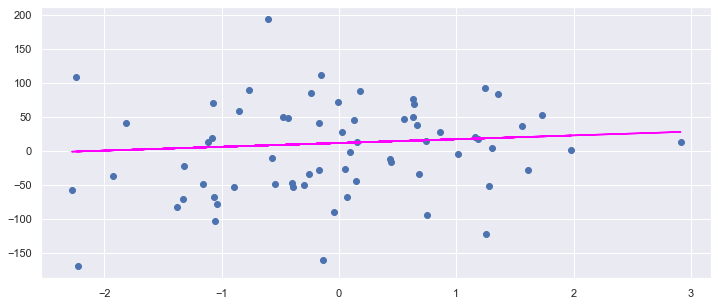

---------- Test score ----------
R^2: -0.6812
MAE: 66.0464
RMSE: 81.1498

---------- Train score ----------
R^2: 0.0088
MAE: 51.6598
RMSE: 63.7652

Признак x_1


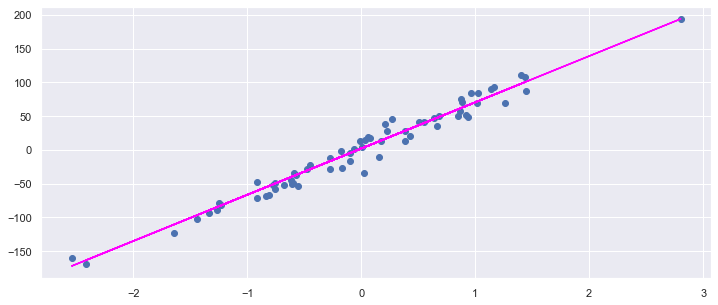

---------- Test score ----------
R^2: 0.9437
MAE: 12.1935
RMSE: 14.8457

---------- Train score ----------
R^2: 0.9733
MAE: 8.4606
RMSE: 10.4705

Признак x_2


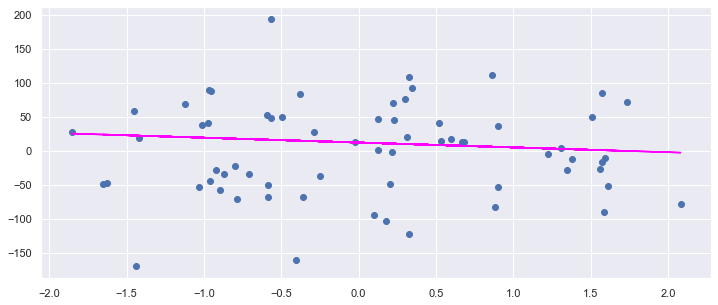

---------- Test score ----------
R^2: -0.9221
MAE: 70.0709
RMSE: 86.7684

---------- Train score ----------
R^2: 0.0126
MAE: 50.7346
RMSE: 63.6434

Признак x_3


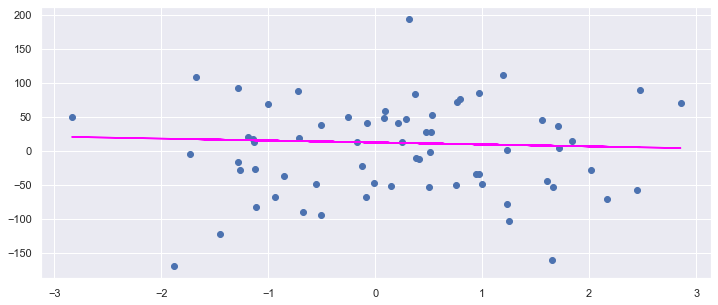

---------- Test score ----------
R^2: -0.8305
MAE: 68.4966
RMSE: 84.6776

---------- Train score ----------
R^2: 0.0030
MAE: 51.5811
RMSE: 63.9519

Признак x_4


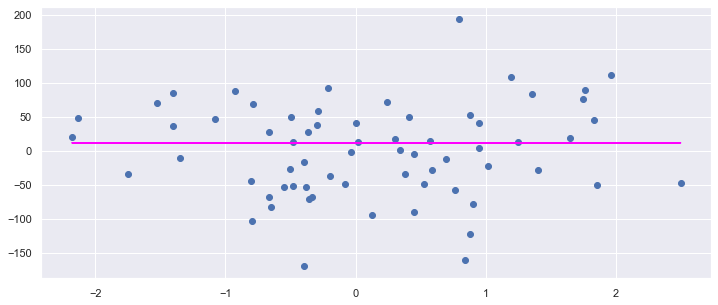

---------- Test score ----------
R^2: -0.7916
MAE: 68.5455
RMSE: 83.7727

---------- Train score ----------
R^2: 0.0000
MAE: 51.6977
RMSE: 64.0473



In [61]:
for xi in X_train.columns:  # для каждого признака
    x, x_train, x_test = X[[xi]], X_train[[xi]], X_test[[xi]]

    model = LinearRegression()
    model.fit(x_train, y_train)

    print(f'Признак {xi}')

    plt.scatter(x=x, y=y)  # график данных
    plt.plot(x.squeeze(), model.predict(x).squeeze(), color='magenta')  # график регрессии
    plt.show()

    # нескольео метрик
    print('-' * 10 + ' Test score ' + '-' * 10)
    pred_test = model.predict(x_test)
    print(f'R^2: {metrics.r2_score(y_test, pred_test):.4f}')
    print(f'MAE: {metrics.mean_absolute_error(y_test, pred_test):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred_test)):.4f}\n')

    print('-' * 10 + ' Train score ' + '-' * 10)
    pred_train = model.predict(x_train)
    print(f'R^2: {metrics.r2_score(y_train, pred_train):.4f}')
    print(f'MAE: {metrics.mean_absolute_error(y_train, pred_train):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_train, pred_train)):.4f}\n')

    print('=' * 70)


## Множественная регрессия

In [62]:
mult_model = LinearRegression()
mult_model.fit(X_train, y_train)
pred_test = mult_model.predict(X_test)

По метрикам множественная регрессия также неплоха как и парная модель $ y = b_0 + b_1 x_1 $

In [63]:
print(f'R^2: {metrics.r2_score(y_test, pred_test):.4f}')
print(f'MAE: {metrics.mean_absolute_error(y_test, pred_test):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred_test)):.4f}\n')

R^2: 0.9617
MAE: 10.0227
RMSE: 12.2540

